In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\basic4.csv')

In [3]:
df.drop(['color'], axis=1, inplace=True)

In [4]:
df.head()

,x,y
0,144.475109,101.450265
1,370.683312,298.003415
2,253.714046,234.079402
3,148.699165,78.654006
4,192.157973,252.837304


In [5]:
df.tail()

,x,y
12524,141.967251,238.963257
12525,161.932857,67.972458
12526,122.451461,94.133502
12527,182.881854,114.104916
12528,123.857932,92.770134


In [6]:
df.describe()

,x,y
count,12529.000000,12529.000000
mean,252.730229,200.991861
std,94.368588,79.893046
min,57.876820,28.500580
25%,175.141025,136.093748
50%,256.816991,200.790004
75%,327.379037,263.893206
max,451.220370,375.904180


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12529 entries, 0 to 12528
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       12529 non-null  float64
 1   y       12529 non-null  float64
dtypes: float64(2)
memory usage: 195.9 KB


In [8]:
sns.pairplot(data=df)

Error in callback <function flush_figures at 0x000001AA217A7B80> (for post_execute):


KeyboardInterrupt: 

In [9]:
df_norm = df

In [10]:
df_norm

,x,y
0,144.475109,101.450265
1,370.683312,298.003415
2,253.714046,234.079402
3,148.699165,78.654006
4,192.157973,252.837304
...,...,...
12524,141.967251,238.963257
12525,161.932857,67.972458
12526,122.451461,94.133502
12527,182.881854,114.104916


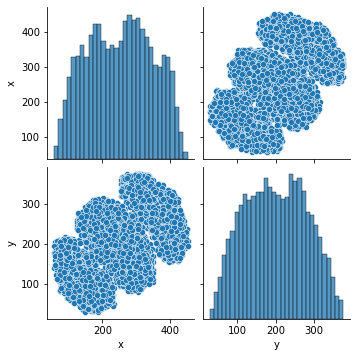

In [11]:
sns.pairplot(data=df)

In [12]:
centers = pd.DataFrame(df_norm.sample(1))

for _ in range(3 - 1):
    print(centers)
    for j in range(len(centers)):
        init_distances = ((df_norm.values - centers.iloc[[j]].values) ** 2).sum(axis=1)
        print(init_distances)
    next_center = df_norm.iloc[[np.argmax(init_distances)]]
    print(next_center)
    
    centers.loc[len(centers.index)] = next_center.iloc[0,:]

               x           y
2763  142.623768  265.260014
[26837.06140974 53083.28612228 13313.28053543 ... 29691.20514532
 24468.57715011 30104.91550351]
               x           y
12451  451.22037  194.576938
               x           y
2763  142.623768  265.260014
1     451.220370  194.576938
[26837.06140974 53083.28612228 13313.28053543 ... 29691.20514532
 24468.57715011 30104.91550351]
[102765.23210382  17183.25372963  40569.19250552 ... 118177.87890698
  78481.30511155 117530.79098779]
             x           y
1568  57.87682  139.945083


In [13]:
centers

,x,y
2763,142.623768,265.260014
1,451.220370,194.576938
2,57.876820,139.945083


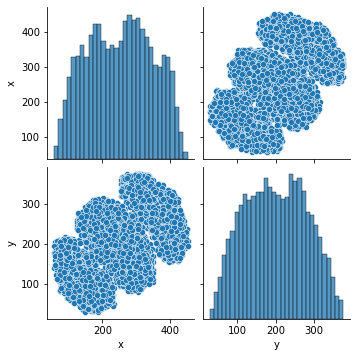

In [14]:
sns.pairplot(data=df,)

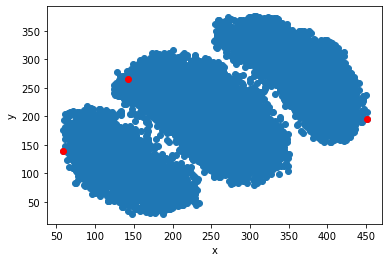

In [17]:
color=['blue','green','cyan']
plt.scatter(df['x'],df['y'])
plt.scatter(centers["x"],centers["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
distances = np.zeros((len(df.index),3))

In [ ]:
distances

In [ ]:
for i in range(3):
    distances[:,i] = (((df.iloc[:, :] - centers.iloc[i, :]) ** 2).sum(axis=1)) ** 0.5
distances

In [ ]:
closest = np.argmin(distances, axis = 1)

In [ ]:
closest

In [ ]:
for i in range(len(centers.index)):
    centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)

In [ ]:
centers

In [ ]:
# np.random.seed(4160659)
# X[closest == 0].mean(axis=0)
centers = df.sample(3)
distances = np.zeros((len(df.index),3))


while True:
    old_closest = closest.copy()
    print(closest)
    
    for i in range(3):
        distances[:,i] = (((df.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
    closest = np.argmin(distances, axis = 1)

    for i in range(len(centers.index)):
        centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)
    if all(closest == old_closest):
        break

In [ ]:
closest

In [ ]:
df['new_column'] = closest.tolist()

In [ ]:
df

In [ ]:
color=['blue','green','cyan']
plt.scatter(df['x'],df['y'], c=closest)
plt.scatter(centers["x"],centers["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
